In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
              
#parameters 
m_0 = 1.0                                          #m=sqrt(x**2+y**2+(z/q)**2)
n = 1.0                                            #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
r_0 = 1/(5e-5**4)                                         #characteristic radius (kpc) (instead of 1.4)
r_0 = 1.4
print(r_0)

#integrate
f = lambda x,m: ((np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2)));
I = quad(f, m_0, np.inf,args=(m_0,))

1.4


In [2]:
g = lambda m: quad(f, m, np.inf,args=(m,))[0]

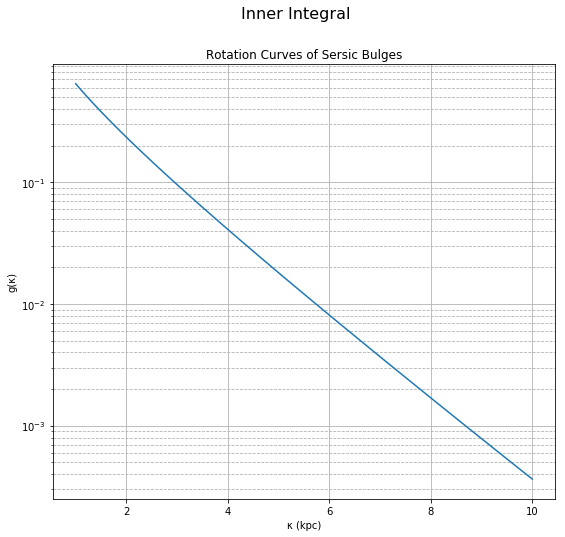

In [3]:
#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

#plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
#labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

#plt.legend(fontsize=14);                                      #adding legend

In [5]:
 #parameters
I_0 = 1.08e3                                        #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 2.8                                           #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 40*(np.pi/180)                                  #inclination angle

#equations
C = (4*G*q*ups*I_0)/(r_0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)
x = np.linspace(0.1, 10, 80)

h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))
#l = lambda r: quad(h, 1, r)[0]
y = np.zeros(np.shape(x))

for j,r in enumerate(x):
    y[j] = quad(h, 0, r,args=(r,))[0]

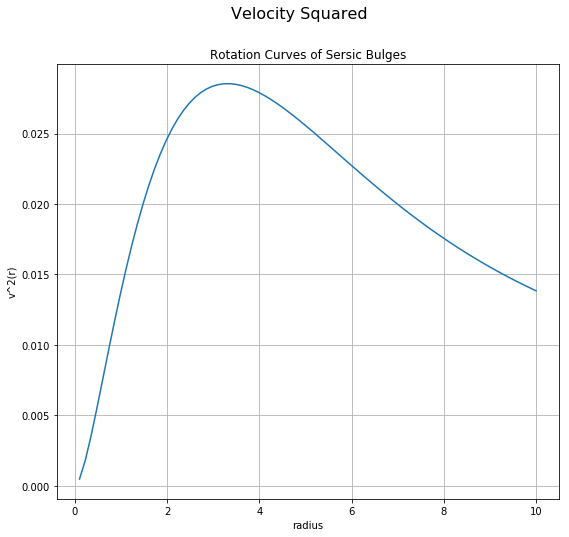

In [6]:
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

 #functions
#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
#labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

#plt.legend(fontsize=14);                                   #adding legend
#plt.show()

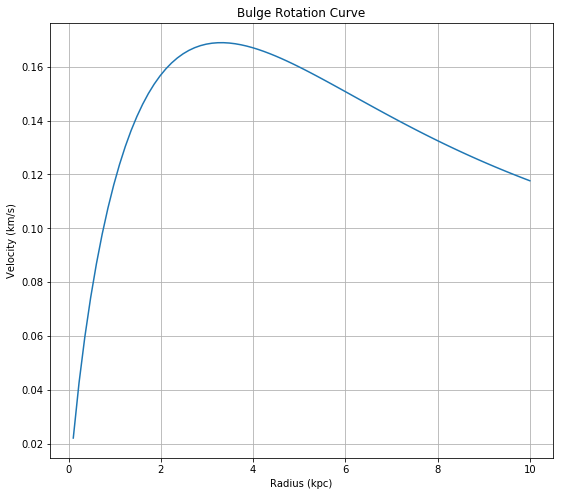

In [11]:
v = np.sqrt(y)

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')


 #functions
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
ax3.set(title='Bulge Rotation Curve')              #labeling axes
ax3.set(xlabel='Radius (kpc)', ylabel='Velocity (km/s)');

#plt.legend(fontsize=14);                                   #adding legend
#plt.savefig('AV_Bulge_Rotation_Curve.png')